<a href="https://colab.research.google.com/github/thebotmakes/ai_and_ml/blob/main/BP0249166_MLAI_Jan25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Dataset Analysis and Modeling

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import seaborn as sns
from sklearn.metrics import recall_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import warnings
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from numpy.random import seed
seed(42)  #added this so results are repeatable

# A) Exploratory Data Analysis and Preprocessing


### 1. Dataset Overview

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
print(X_train[:5])

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

So pixels are in 0-255 format RGB

In [ ]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


Labels are in single number format - let's look at the distribution

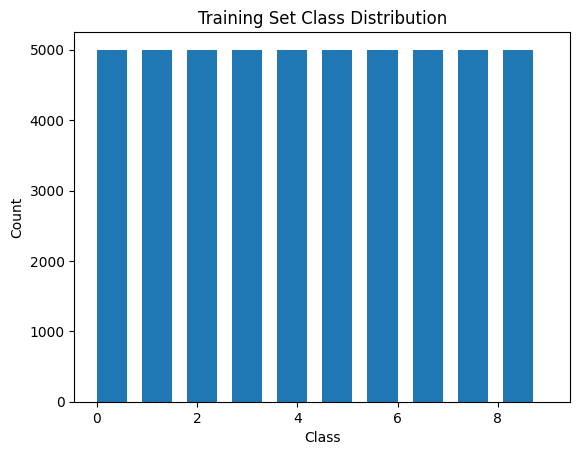

In [ ]:
plt.hist(y_train.flatten(), width = 0.6)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Set Class Distribution")
plt.show()

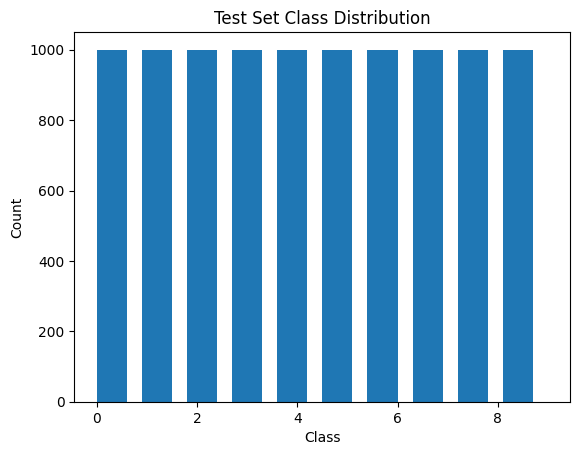

In [ ]:
plt.hist(y_test.flatten(), width = 0.6)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Test Set Class Distribution")
plt.show()

So balanced dataset with 5,000 entries for each class in the training dataset and 1,000 entries each in test

### 4. Visualization

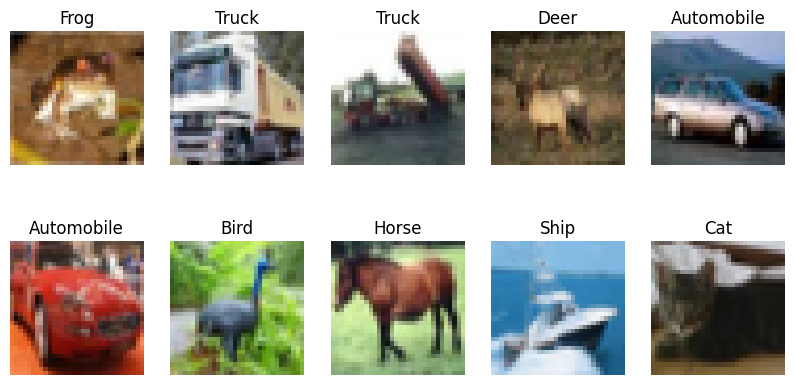

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Visualize some sample images with labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] #can you retrieve the class names from the dataset?

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Pre-processing

In [ ]:
ntrainsamples = X_train.shape[0]
ntestsamples = X_test.shape[0]

X_train_2d = np.reshape(X_train, (ntrainsamples, -1))
X_test_2d = np.reshape(X_test, (ntestsamples, -1))

scaler_train = preprocessing.StandardScaler().fit_transform(X_train_2d)
scaler_test = preprocessing.StandardScaler().fit_transform(X_test_2d)

# B) Clustering

In [ ]:
pca = PCA()

pca.fit(scaler_train)
pca.fit(scaler_test)

X_train_pca = pca.transform(scaler_train)
X_test_pca = pca.transform(scaler_test)

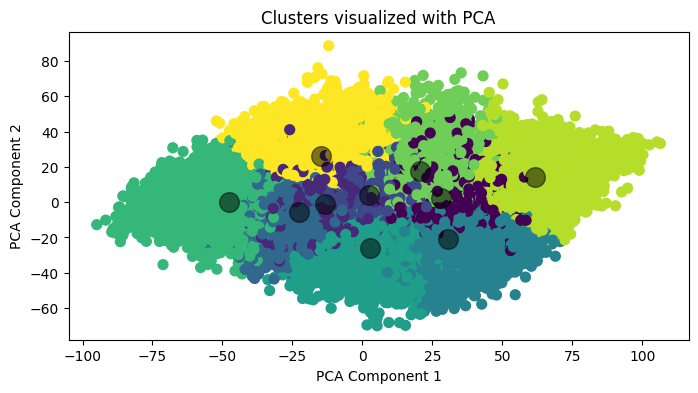

In [ ]:
n = 10
k_means = KMeans(n_clusters=n)
k_means.fit(X_train_pca)
y_kmeans = k_means.predict(X_train_pca)

plt.figure(figsize=(8, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("Clusters visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

So the chart shows some reasonably good clustering around the edges, but very little clarity in the middle

In [ ]:
kmeans_acc = accuracy_score(y_train, y_kmeans)
print(f"Accuracy: {kmeans_acc}")
sil_score = silhouette_score(X_train_pca, y_kmeans)
print(f"Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(X_train_pca, y_kmeans)
print(f"Davies-Bouldin Index: {db_score}")
ch_score = calinski_harabasz_score(X_train_pca, y_kmeans)
print(f"Calinski-Harabasz Index: {ch_score}")

Accuracy: 0.10812
Silhouette Score: 0.047269763638798756
Davies-Bouldin Index: 2.8273466692757125
Calinski-Harabasz Index: 2921.162018201226


(need to do more reasearch on which is the best metric for clustering)

Next I'm going to create a function to display a confusion matrix as we'll re-use for each of the models (matrix from Tunstall, 2022)

In [ ]:
def plot_confusion_matrix(y_preds, y_true, labels, model_name):
  cm = confusion_matrix(y_true, y_preds)
  fig, ax = plt.subplots(figsize = (6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
  disp.plot(cmap = "Blues", ax = ax, colorbar = False)
  plt.xticks(rotation = 45)
  title = f"{model_name} Confusion Matrix"
  ax.set_title(title)
  plt.show()

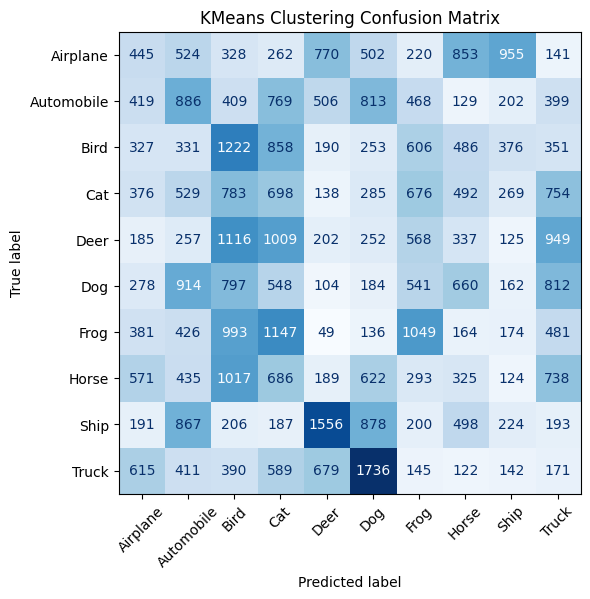

In [ ]:
plot_confusion_matrix(y_kmeans, y_train, class_names, "KMeans Clustering")

Now lets look at some of items contained in the groupings:

There are 3788 members in cluster 0
[ 11  18  29  43  53  72  95 105 118 120]


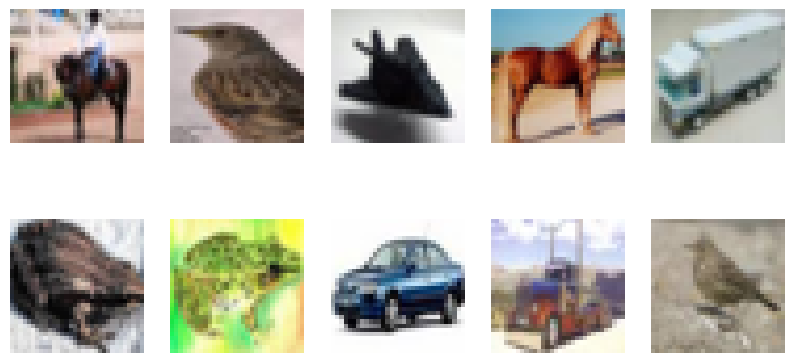

There are 5580 members in cluster 1
[ 0  1  4 30 33 39 44 46 47 51]


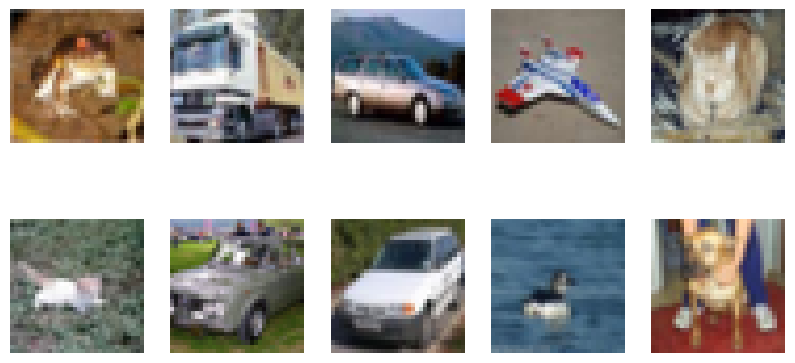

There are 7261 members in cluster 2
[ 6  7 21 28 34 35 42 58 61 66]


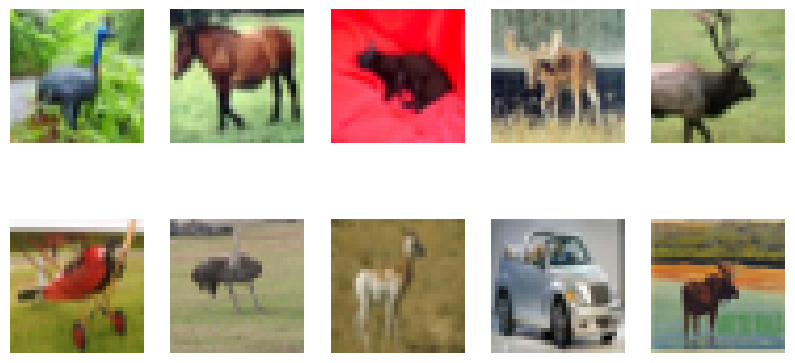

There are 6753 members in cluster 3
[ 5  9 14 23 24 26 32 37 45 63]


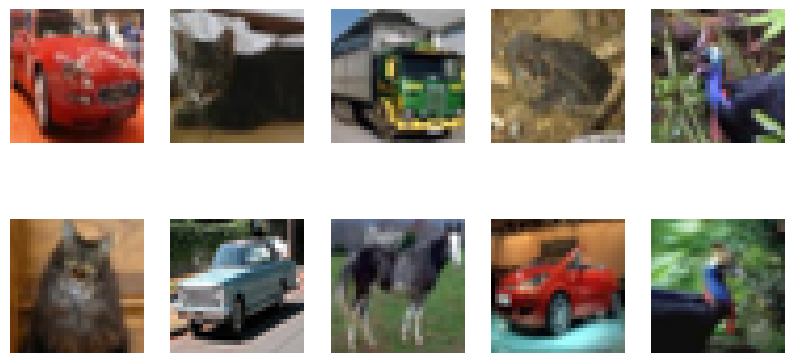

There are 4383 members in cluster 4
[ 15  38  55  67  76 109 115 119 126 127]


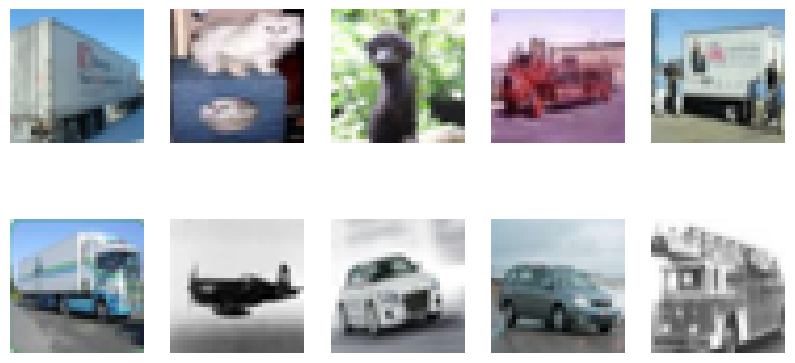

There are 5661 members in cluster 5
[ 2 12 16 25 31 40 59 69 83 94]


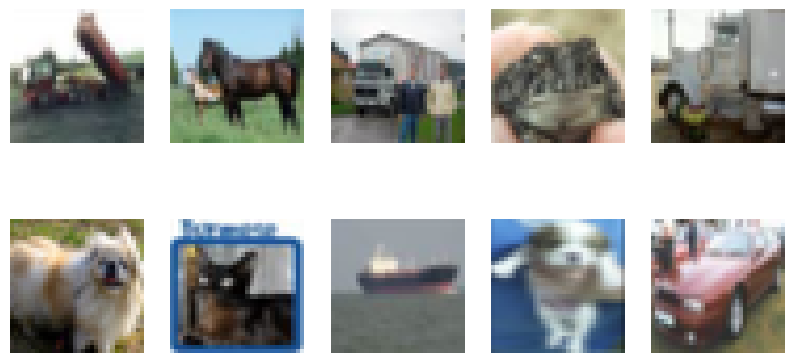

There are 4766 members in cluster 6
[ 3 10 13 17 22 27 54 57 85 99]


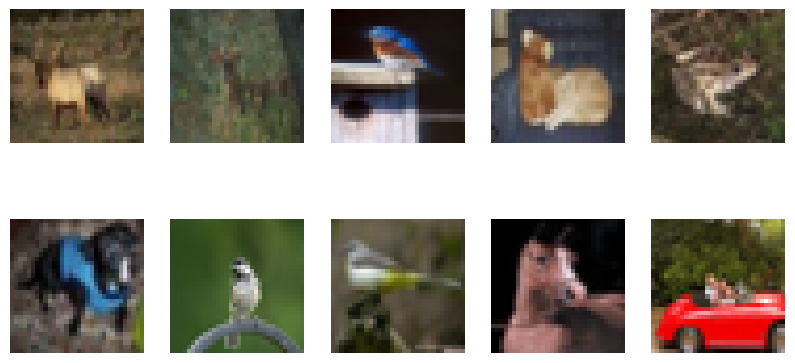

There are 4066 members in cluster 7
[  8  36  65  92 129 153 171 194 210 213]


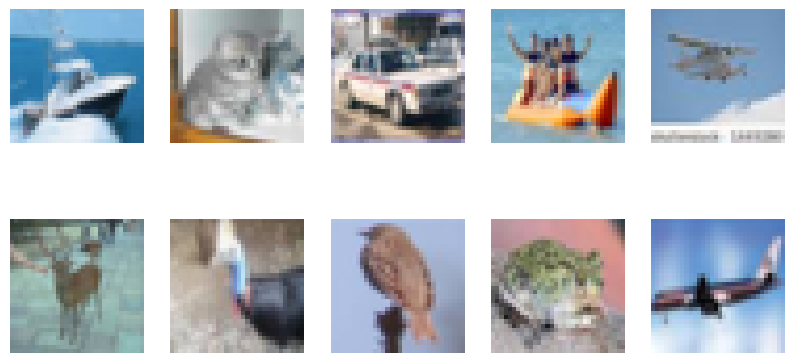

There are 2753 members in cluster 8
[ 20  41  48  49  79 100 108 138 160 191]


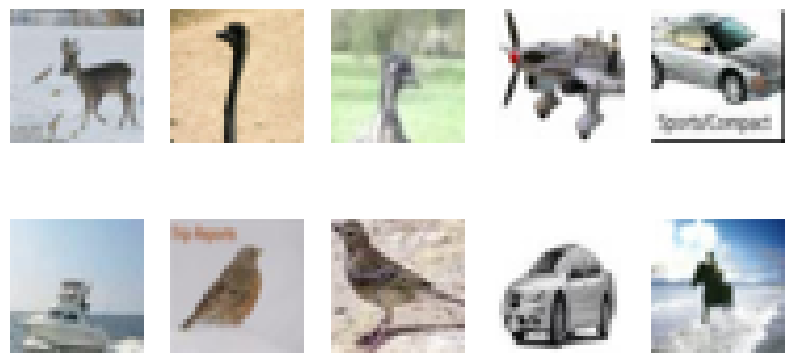

There are 4989 members in cluster 9
[ 19  50  52  56  84  86  87 157 164 175]


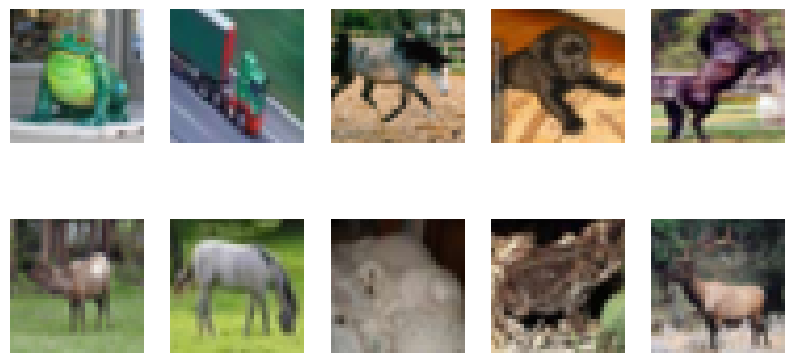

In [ ]:
for cluster in np.arange(n):

    cluster_member_indices = np.where(y_kmeans == cluster)[0]
    print("There are %s members in cluster %s" % (len(cluster_member_indices), cluster))

    first_ten = cluster_member_indices[:10]
    print(first_ten)
    #pick a random member
    plt.figure(figsize=(10, 5))
    count = 0
    for x in first_ten:
      plt.subplot(2, 5, count+1)
      plt.imshow(X_train[x])
      plt.axis('off')
      count += 1
    plt.show()

So this reflects what we're seeing in the metrics - although some clusters are better than others (cluster 9 has 5 horses for example) some are terrible (cluster 7 has a mix of 7 classes!)

(To do: Try converting to black and white!!!!)


# C) Classification models

Decision Tree

(general layout for this section from Navlani, 2023)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(scaler_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(scaler_test)

# Model Accuracy, how often is the classifier correct?
tree_acc = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", tree_acc)

Accuracy: 0.2689


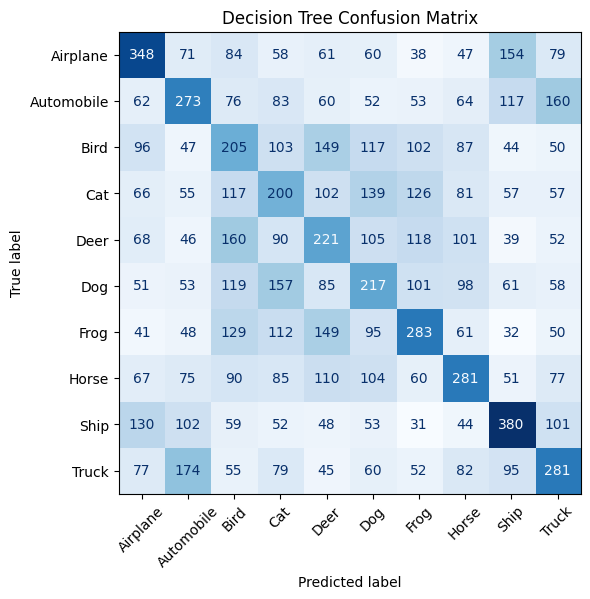

In [ ]:
plot_confusion_matrix(y_pred_tree, y_test, class_names, "Decision Tree")

Accuracy is fairly low at 27%, and this is reflected in the confusion matrix where the strongest score in the test set is 380 / 1000 for Ships.  Some of the categories like Dog, Frog and Bird are showing high levels of confusion with the predictions spread across a number of other categories.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifer object
rf = RandomForestClassifier()

# Train Decision Tree Classifer
rf = rf.fit(scaler_train, y_train)

#Predict the response for test dataset
y_pred_rf = rf.predict(scaler_test)

# Model Accuracy, how often is the classifier correct?
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_acc)

Accuracy: 0.4677


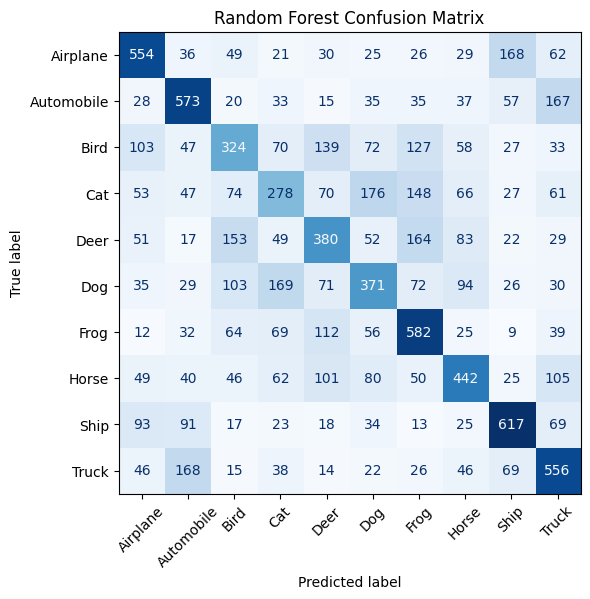

In [ ]:
plot_confusion_matrix(y_pred_rf, y_test, class_names, "Random Forest")

Accuracy, while still not great, is much higher at 47%.  Good strong colours across the diagonal represent a high level of correct predictions, with Automobile, Horse and Ship particularly strong.  As could maybe be predicted there's some level of confusion around similar objects like Cat / Dog and Truck / Automobile.

SVM

(note - this one takes ages to run compared to the other models!)

In [ ]:
from sklearn.svm import LinearSVC

# Create SVM classifer object
svm = LinearSVC() #had to switch to this as standard SVC couldnt handle the dataset

# Train Decision Tree Classifer
svm = svm.fit(scaler_train, y_train)

#Predict the response for test dataset
y_pred_svm = svm.predict(scaler_test)

# Model Accuracy, how often is the classifier correct?
svm_acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_acc)

Accuracy: 0.3617


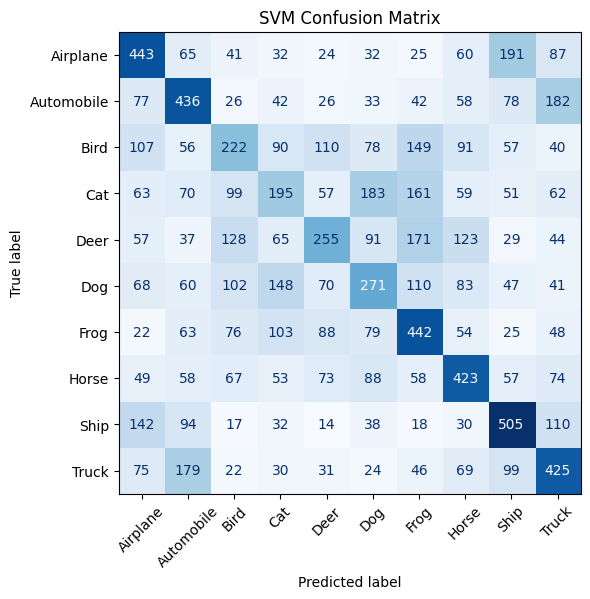

In [ ]:
plot_confusion_matrix(y_pred_svm, y_test, class_names, "SVM")

Accuracy is worse than Random Forest at only 36%, and none of the categories has a higher level of correct predictions compared to Random Forest.

Other model such as K-nearest neighbours or XGBoost

In [ ]:
import xgboost as xgb

# Create SVM classifer object
xg_cl = xgb.XGBClassifier(n_estimators=10, objective='multi:softmax', num_class=10) # xgboost multivariate classifier

# Train Decision Tree Classifer
xg_cl = xg_cl.fit(scaler_train, y_train)

#Predict the response for test dataset
y_pred_xg = xg_cl.predict(scaler_test)

# Model Accuracy, how often is the classifier correct?
xgboost_acc = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", xgboost_acc)

Accuracy: 0.4365


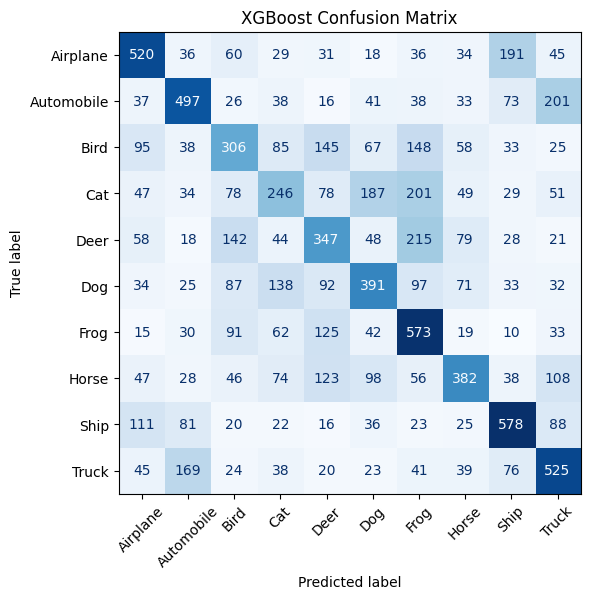

In [ ]:
plot_confusion_matrix(y_pred_xg, y_test, class_names, "XGBoost")

Although not as good as Random Forest accuracy is better than the other models at 43%.  Again seeing good strong colours across the diagonal, with some categories such frog and ship being particularly strong, and the problem categories such as Cat / Dog, Airplane / Ship and Truck / Automobile again showing a higher level of confusion (although in this model lots of confusion with cats being labelled as frogs, which we didn't see as strongly in the other models).

# D) Neural Networks

In [ ]:
nn_acc = 0 #placeholder for now so table below works

# E) Hyperparameter Optimization

In [ ]:
opt_nn_acc = 0

# F) Results Summary and Discussion

Following cell creates a nice highlighted table to show the model with the best metric

In [ ]:
#(Highlighting code taken from here: https://www.geeksforgeeks.org/highlight-the-maximum-value-in-each-column-in-pandas/)

def highlight_max(s):
    if s.dtype == object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: green' if cell else '' for cell in is_max]

In [ ]:
scores_dict = {'model': ["KMeans", "Decision Tree", "Random Forest", "SVM", "XGBoost", "Neural Network", "Optimised Neural Network"],
               'Accuracy': [kmeans_acc, tree_acc, rf_acc, svm_acc, xgboost_acc, nn_acc, opt_nn_acc]
                }

scores_df = pd.DataFrame(scores_dict)

scores_df['Accuracy'] = scores_df['Accuracy'].apply(lambda x: float("{:.3f}".format(x)))
scores_df.style.apply(highlight_max)

,model,Accuracy
0,KMeans,0.108000
1,Decision Tree,0.269000
2,Random Forest,0.468000
3,SVM,0.362000
4,XGBoost,0.436000
5,Neural Network,0.000000
6,Optimised Neural Network,0.000000


From the models tested so far Random Forest has the highest accuracy, with XGBoost close behind.

(To do - create table showing the true positives for each of the models so we can see which classes the individual models are strongest on (i.e. table of the diagonals)

# G) References

Géron, A., 2022. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

Navlani, A. (2023). Python Decision Tree Classification Tutorial: Scikit-Learn DecisionTreeClassifier. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/decision-tree-classification-python.

Tunstall, L. (2022). NATURAL LANGUAGE PROCESSING WITH TRANSFORMERS : building language applications with hugging face. S.L.: O’reilly Media.

‌